In [1]:
"""
Name: con_munich_test.ipynb
Authors: Stephan Meighen-Berger
Checking parameters for munich, still needs work
"""
%load_ext autoreload
%autoreload 2

In [2]:
 # General imports
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy.signal import savgol_filter
from tqdm import tqdm
import pandas as pd
from scipy.interpolate import UnivariateSpline
from scipy.optimize import minimize_scalar

In [3]:
# Adding path to module
sys.path.append("../")

In [4]:
# picture path
PICS = '../pics/'

In [5]:
# Munich data
pop_munich = 1.456 * 1e6
time_steps = [7., 9., 10., 11., 12., 13.,
              14., 15., 16., 17., 18., 19.,
              20., 21., 23., 24., 25., 26., 27.]
data_points = [44., 60., 68., 88., 110.,
               149., 201., 242., 260., 359., 509.,
               676., 878., 1042., 1316., 1381.,
               1576., 1687., 1845.
              ]

In [6]:
# Module imports
from contagion import Contagion, config
# Simulation time
config["simulation length"] = 30
# Population
config['re-use population'] = True
config["average social circle"] = 40
config["population size"] = int(pop_munich)
config['mean social circle interactions'] = 0.2
# Distributions
config['infection duration pdf'] = 'gamma'
config['infectious duration pdf'] = 'gamma'
config['incubation duration pdf'] = 'gamma'
config['hospitalization duration pdf'] = 'gamma'
config['time until hospitalization pdf'] = 'gamma'
config['time incubation death pdf'] = 'gamma'
config['recovery time pdf'] = 'gamma'
config['population storage'] = "../populations/munich.pkl"
# Random state
config["random state"] = np.random.RandomState(1337)

In [7]:
def min_func(i0):
    # The starting infection count
    config["infected"] = int(i0)
    # Creating a contagion object
    contagion = Contagion()
     # Storing the solutions
    contagion.sim()
    stats = pd.DataFrame(contagion.statistics)
    spl_mc = UnivariateSpline(contagion.t + 7., stats['is_infected'])
    sim_res = spl_mc(time_steps) * data_points[0] / spl_mc(time_steps[0])
    to_min = np.sum((sim_res - np.array(data_points))**2.)
    print('Infected')
    print(i0)
    print('Value')
    print(to_min)
    return np.log10(to_min)

In [8]:
# Curve fitting
# min_object = minimize_scalar(min_func, 100., bounds=(100., 1e3), method='bounded')

In [9]:
# min_object.x
# 658

In [10]:
# Run
config["infected"] = int(1)
# Creating a contagion object
contagion = Contagion()
 # Storing the solutions
contagion.sim()
stats = pd.DataFrame(contagion.statistics)
spl_mc = UnivariateSpline(contagion.t + 7., stats['is_infected'])

In [11]:
# Plotting standards
std_size = 10.
fontsize = 15.
lw=3.
h_length=1.

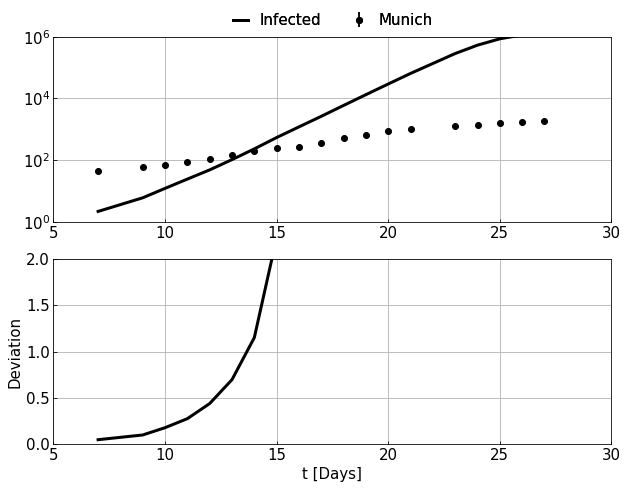

In [23]:
 # Infections per time step
figure, (ax1,ax2) = plt.subplots(2, 1, figsize=(std_size, std_size * 6. / 8.))
colors = ['#fdcc8a',
          '#fc8d59',
          '#d7301f']
ax1.plot(time_steps, spl_mc(time_steps),
         lw=lw, label='Infected', color="k")
ax1.errorbar(time_steps, data_points, yerr=np.sqrt(data_points),
             markersize=lw*2, ls='', marker='o', color='k', label='Munich')
ax1.set_xlim(5, 30)
ax1.set_ylim(1e0, 1e6)
ax1.set_xscale('linear')
ax1.set_yscale('log')
ax2.set_ylabel(r'Count', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h,l, loc=9, bbox_to_anchor=(0.5, +1.2),
                  ncol=3, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
ax1.add_artist(lgd1)
ax1.grid(True)
ax2.plot(time_steps, spl_mc(time_steps) / data_points,
         lw=lw, label='Infected', color="k")
ax2.set_xlim(5, 30)
ax2.set_ylim(0., 2.)
ax2.set_xscale('linear')
ax2.set_yscale('linear')
ax2.set_xlabel(r't [Days]', fontsize=fontsize)
ax2.set_ylabel(r'Deviation', fontsize=fontsize)
ax2.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax2.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
ax2.grid(True)
plt.show()

In [13]:
figure.savefig(PICS + "Contagion_Munich_2.png",
               bbox_inches='tight')

In [25]:
spl_mc(20.)

array(29231.99394013)